In [1]:
try:
  print("Dependencies are already installed. Skipping...")
  from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
  from qiskit.visualization import plot_bloch_multivector, plot_histogram
  from qiskit.providers.aer import QasmSimulator
  from qiskit import execute,Aer
  import math
  from qiskit import transpile
except:
  print("Installing Corresponing Dependencies")
  ! pip install qiskit
  ! pip install pylatexenc
  from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
  from qiskit.visualization import plot_bloch_multivector, plot_histogram
  from qiskit.providers.aer import QasmSimulator
  from qiskit import execute,Aer
  import math
  from qiskit import transpile

Dependencies are already installed. Skipping...


In [2]:
!rm -r modules

In [3]:
# import modules
import requests
from pathlib import Path
import os


directory = Path("modules")

if not os.path.exists(directory):
  os.makedirs(directory)
  
helper_modules = {
    "quantum_hardware_circuits.py":"https://raw.githubusercontent.com/Q-b1t/Quantum_Mechanics-Computing_Stuff/master/modules/quantum_hardware_functions/quantum_hardware_circuits.py",
    "experiment_utils.py":"https://raw.githubusercontent.com/Q-b1t/Quantum_Mechanics-Computing_Stuff/master/modules/utils/experiment_utils.py"
    }

for module,raw in helper_modules.items():
  module_file = directory / module
  if(module_file.exists()):
    print(f"Module: {module_file} already exists. Skipping...")
  else:
    print(f"Downloading {module}")
    request = requests.get(raw)
    with open(module_file,"wb") as f:
      f.write(request.content)

In [4]:
from modules.experiment_utils import ideal_qc_simulation,get_target_measurement,initialize_quantum_circuit,reverse_output,make_meaurement

In [5]:
backend = QasmSimulator()

# Quantum Binary Encoder Implementation:

A 4 -> 2 quantum decimal to binary encoder implementation:

In [6]:
num_qubits = 6
num_measurements = 2

In [7]:
qr = QuantumRegister(num_qubits)
cr = ClassicalRegister(num_measurements)
qc = QuantumCircuit(qr,cr)

In [8]:
# encoder input
circuit_input = [0]
initialize_quantum_circuit(qc,circuit_input)

In [9]:
qc.barrier()

In [10]:
# apply not gates
qc.x(qr[0])
qc.x(qr[1])
qc.x(qr[2])

# these are because we must send |1> to the 4 and 5th qubits
qc.x(qr[4])
qc.x(qr[5])

In [11]:
# apply toffoli gates
qc.ccx(qr[0],qr[1],qr[4])
qc.ccx(qr[0],qr[2],qr[5])

In [12]:
# make quantum measurements
output_qubits = [4,5]
for c,q in enumerate(output_qubits):
  qc.measure(qr[q],cr[c])

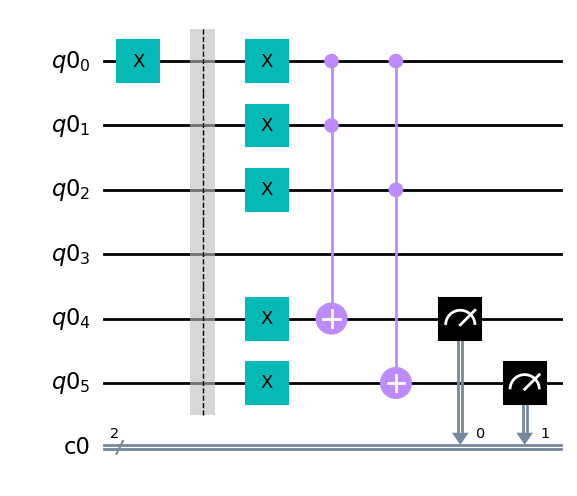

In [13]:
qc.draw("mpl")

In [14]:
counts = ideal_qc_simulation(qc,backend,1)

In [15]:
output = list(counts.keys())[0]

In [16]:
output = reverse_output(output)
output

'11'

# Quantum Decoder Implementation
An implementation 2 -> 4 of a quantum binary to decimal decoder:

In [17]:
num_qubits = 4
num_measurements = 4

In [18]:
qr = QuantumRegister(num_qubits)
cr = ClassicalRegister(num_measurements)
qc = QuantumCircuit(qr,cr)

In [19]:
# decoder input
circuit_input = [0,1]
initialize_quantum_circuit(qc,circuit_input)

In [20]:
qc.barrier()

In [21]:
# this gate must receibe |1> on for the circuit to work
qc.x(qr[3])
# build the quantum circuit
qc.cx(qr[0],qr[3])
qc.ccx(qr[1],qr[3],qr[2])
qc.cx(qr[2],qr[1])
qc.swap(qr[0],qr[1])
qc.cx(qr[2],qr[3])
qc.cx(qr[0],qr[1])


In [22]:
# make the quantum measurements
for i in range(num_measurements):
  qc.measure(qr[i],cr[i])

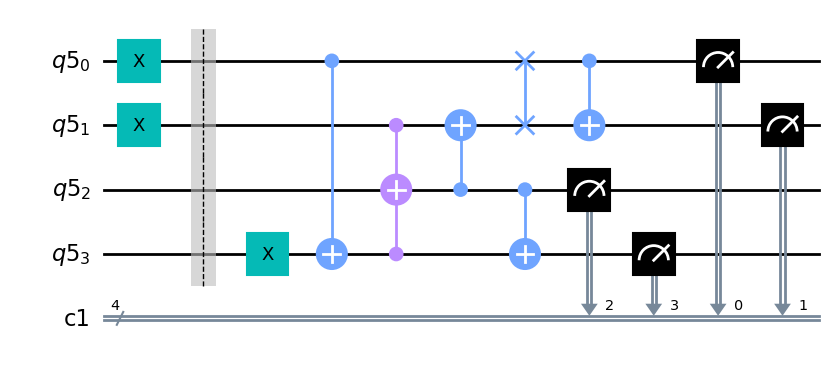

In [23]:
qc.draw("mpl")

In [24]:
counts = ideal_qc_simulation(qc,backend,1)

In [25]:
output = list(counts.keys())[0]

In [26]:
output = reverse_output(output)
output

'1000'

# Circuit Implementation as quantum gates

In [27]:
# implemented as functions
def quantum_bdc_encoder_4_2(initialize_quantum_state = False):
  # instance quantum circuit
  qr = QuantumRegister(6)
  qc = QuantumCircuit(qr)
  # apply not gates
  qc.x(qr[0])
  qc.x(qr[1])
  qc.x(qr[2])

  if initialize_quantum_state:
    # these are because we must send |1> to the 4 and 5th qubits
    qc.x(qr[4])
    qc.x(qr[5])
  
  # apply toffoli gates
  qc.ccx(qr[0],qr[1],qr[4])
  qc.ccx(qr[0],qr[2],qr[5])
  return qc


def quantum_bdc_decoder_4_2(initialize_quantum_state = False):
  # instance quantum circuit
  qr = QuantumRegister(4)
  qc = QuantumCircuit(qr)
  if initialize_quantum_state:
    # this gate must receibe |1> on for the circuit to work
    qc.x(qr[3])
  # build the quantum circuit
  qc.cx(qr[0],qr[3])
  qc.ccx(qr[1],qr[3],qr[2])
  qc.cx(qr[2],qr[1])
  qc.swap(qr[0],qr[1])
  qc.cx(qr[2],qr[3])
  qc.cx(qr[0],qr[1])

  return qc

## Gates Test

In [28]:
num_qubits = 8
num_measurements = 4

In [29]:
qr = QuantumRegister(num_qubits)
cr = ClassicalRegister(num_measurements)
qc = QuantumCircuit(qr,cr)

In [30]:
q_enc = quantum_bdc_encoder_4_2(initialize_quantum_state=True) 
q_dec = quantum_bdc_decoder_4_2(initialize_quantum_state=True) 

In [31]:
initial_state = [3]
initialize_quantum_circuit(qc,initial_state)

In [32]:
qc.barrier()

In [33]:
qc.append(q_enc,[qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])

In [34]:
qc.append(q_dec,[qr[4],qr[5],qr[6],qr[7]])

In [35]:
output_qubits = [4,5,6,7]
for c,q in enumerate(output_qubits):
  qc.measure(qr[q],cr[c])

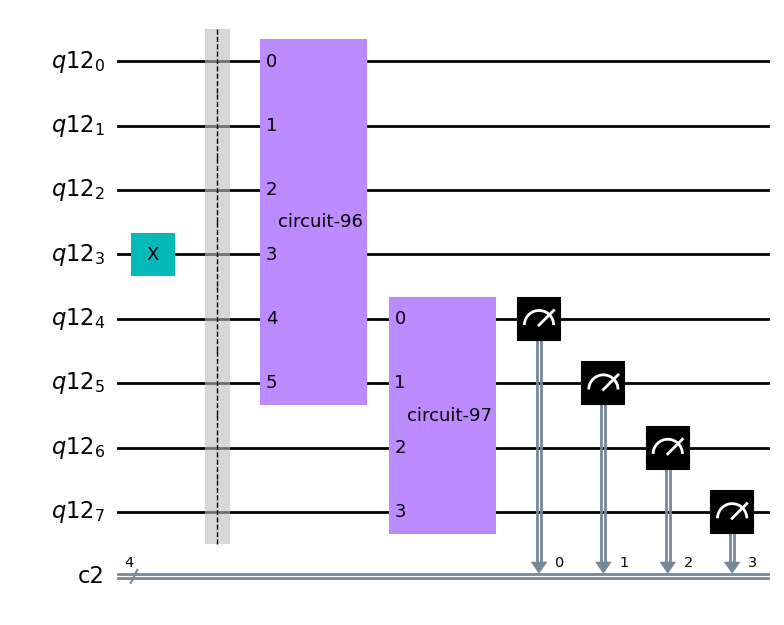

In [36]:
qc.draw("mpl")

In [37]:
counts = ideal_qc_simulation(qc,backend,1)

In [38]:
output = list(counts.keys())[0]

In [39]:
output = reverse_output(output)
output

'0001'

In the circuit implemented above, the decimal multibit signal that enters the circuit is the same that is obtained in the post-measurement state. This shows the implementation is correct.